## 课题分析


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 20230425数据（bulk DNA组样本 sample1 batch2）
### 原始信息

In [2]:
stats_path = "./04.stat_info"
file_list = [x for x in os.listdir(stats_path) if x.endswith("tsv")]
name_list = [x.split('_')[1] for x in file_list]

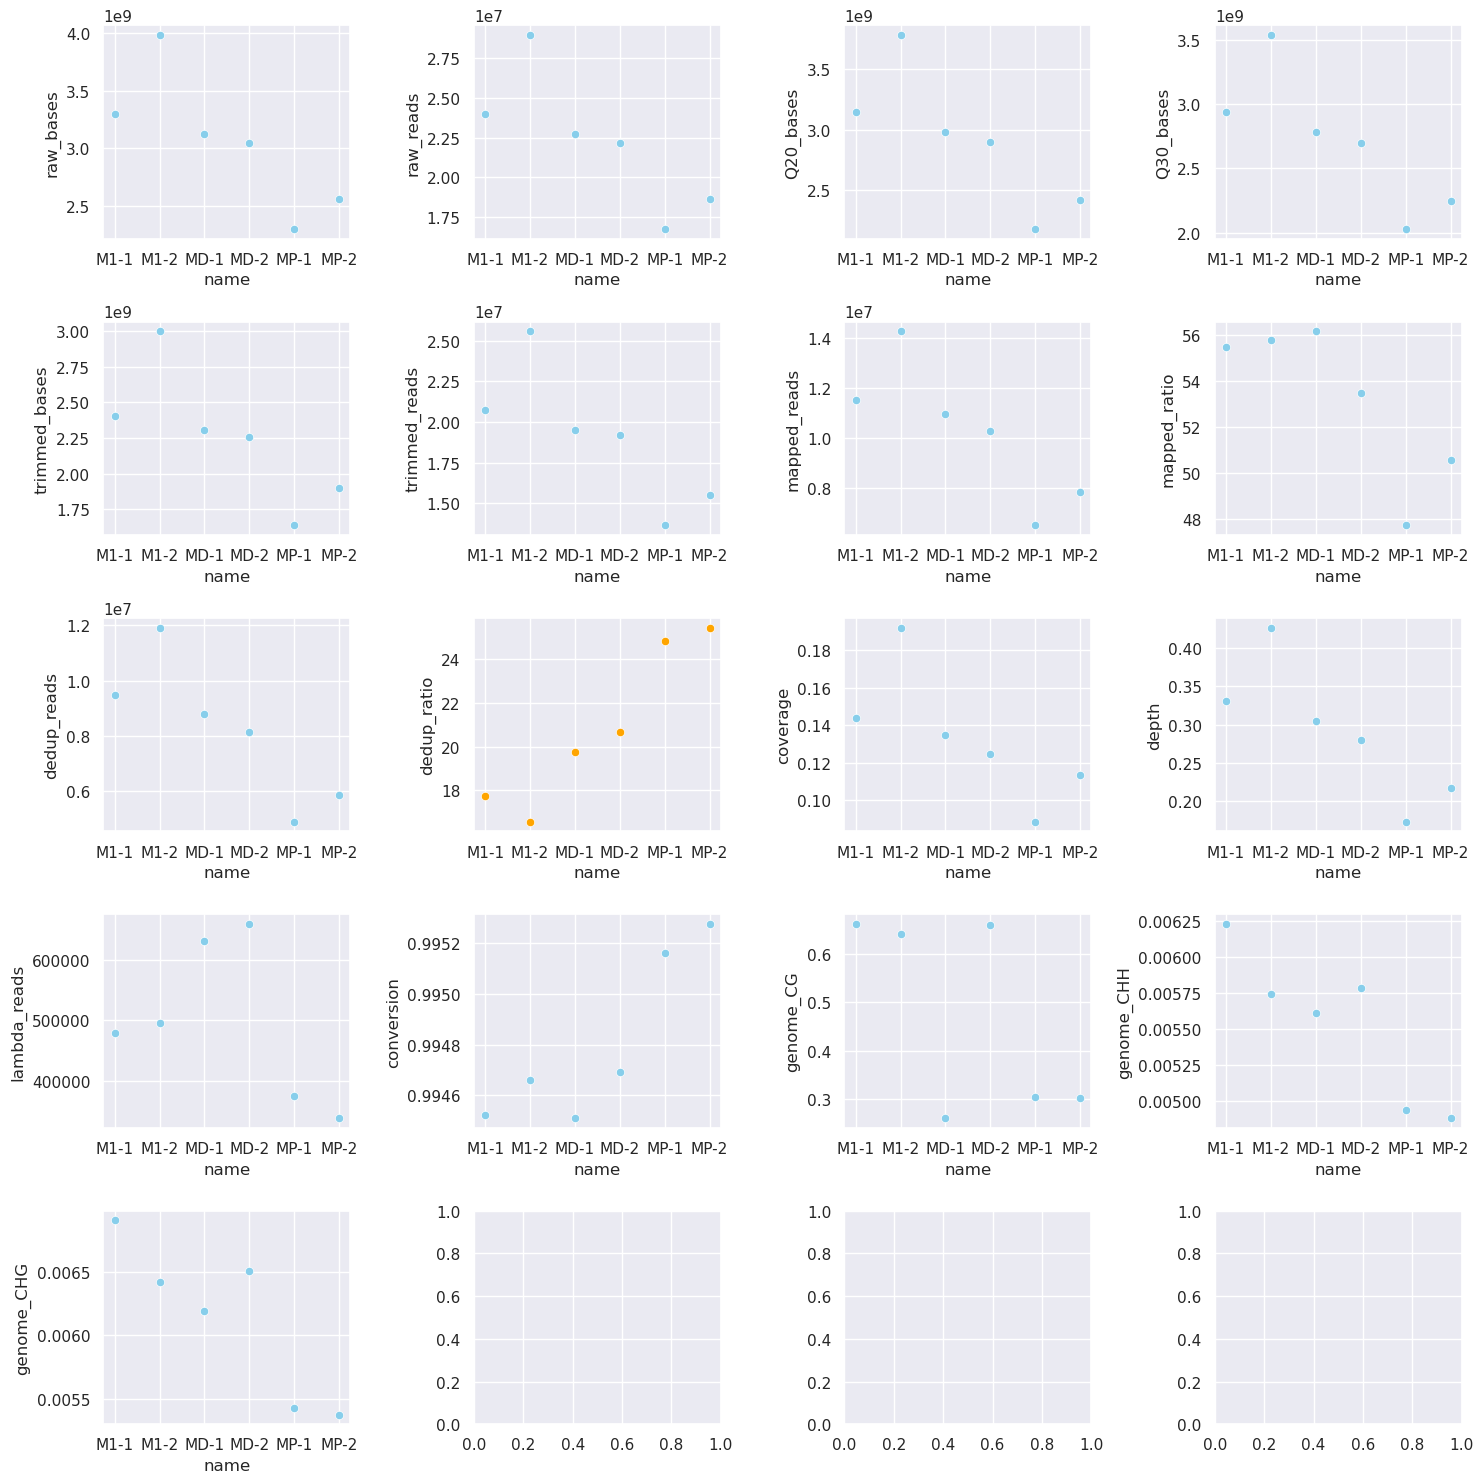

In [3]:
sns.set()

tsv_list = []
for file in file_list:
    tsv_df = pd.read_csv(os.path.join(stats_path, file), sep="\t")
    # 将tsv文件添加到列表中
    tsv_list.append(tsv_df)
    
merged_df = pd.concat(tsv_list, axis=0)
merged_df = merged_df.set_index(merged_df.columns[0])
merged_df['name'] = name_list
merged_df = merged_df.sort_values(by='name')

# 设置画布大小
mpl.rcParams['figure.figsize'] = [15, 15]
# 使用subplots函数，创建一个子图网格
selected = ["dedup_ratio", "base_capture", "onTarget_coverage", "onTarget_depth", "onTarget_coverage_more5"]
fig, axes = plt.subplots(nrows=len(merged_df.columns)//4+1, ncols=4)
# 遍历每一列
for i, colname in enumerate(merged_df.columns):
    if colname == 'name': continue
    row = i//4
    col = i%4
    # 使用boxplot函数，对每一列画boxplot
    if colname in selected:
        sns.scatterplot(x=merged_df["name"], y=merged_df[colname], ax=axes[row, col], color="orange")
    else:
        sns.scatterplot(x=merged_df["name"], y=merged_df[colname], ax=axes[row, col], color="skyblue")
    # 设置子图的标题为列名
    # axes[row, col].set_title(colname)

# 遍历每一个子图
# for ax in axes.flat:
#     # 旋转x轴标签
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# 设置总标题
# fig.suptitle("Boxplot of each column in merged data frame")
# 调整子图之间的间距
fig.tight_layout()
# 显示图形
plt.show()

### SNPs结果

In [24]:
import os
import pandas as pd
import seaborn as sns

vcf_path = "./06.anno_snps"
vcf_list = [x for x in os.listdir(vcf_path) if x.endswith("vcf")]
name_list = [x[9:].split('_')[1] for x in vcf_list]

merged_vcf_data = pd.DataFrame()
for i, file in enumerate(vcf_list):
    data = pd.read_csv(os.path.join(vcf_path, file), sep="\t", comment="#", header=None)
    data.columns = ["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT", "SAMPLE"]
    data["name"] = name_list[i]
    merged_vcf_data = pd.concat([merged_vcf_data, data], axis=0)

merged_vcf_data['AF'] = merged_vcf_data.SAMPLE.apply(lambda x: x.split(":")[2])
merged_vcf_data['ANN'] = merged_vcf_data.INFO.apply(lambda x: [y for y in x.split(";") if y.startswith("ANN")][0])
merged_vcf_data['GENE'] = merged_vcf_data.ANN.apply(lambda x: x.split("|")[3])
merged_vcf_data['EFFECT'] = merged_vcf_data.ANN.apply(lambda x: x.split("|")[1])
merged_vcf_data = merged_vcf_data[merged_vcf_data.FILTER == "PASS"]
merged_vcf_data = merged_vcf_data[['name', 'CHROM', 'POS', 'ID', 'REF', 'ALT', 'AF', 'GENE', 'EFFECT']]
merged_vcf_data

,name,CHROM,POS,ID,REF,ALT,AF,GENE,EFFECT
10,MXG-2,chr2,25248086,.,G,C,0.497,DNMT3A,missense_variant
35,MXG-2,chr2,25301694,.,A,ATTAGTCATGCCAGAGCCCAGCTG,0.018,DNMT3A,intron_variant
37,MXG-2,chr2,25309575,.,T,C,0.010,DNMT3A,intron_variant
45,MXG-2,chr2,25799447,COSV55460549,C,T,9.107e-03,ASXL2,missense_variant
46,MXG-2,chr3,47056922,.,G,T,0.501,SETD2,missense_variant
...,...,...,...,...,...,...,...,...,...
92,TWZ-1,chr7,140794328,.,T,C,0.474,BRAF,missense_variant
95,TWZ-1,chr9,21994281,.,C,CTCACGGGGGAGT,0.035,CDKN2A,disruptive_inframe_insertion
99,TWZ-1,chr9,136506847,.,G,GTGGCACCCAGAACT,0.017,NOTCH1,frameshift_variant
103,TWZ-1,chr11,534262,.,T,TGGTCA,7.934e-03,HRAS,frameshift_variant&stop_gained


In [25]:
merged_vcf_data['name'].unique()

array(['MXG-2', 'HWH', '293T', 'BSX-1', 'LBB-2', 'GBF-2', 'LXQ-1',
       'BYF-2', 'PXC-2', 'SPK-2', 'YWS-1', 'LZY', 'MJJ-2', 'K562',
       'AZM-2', 'HWH-U-K', 'LZY-U-K', 'TWZ-1'], dtype=object)

In [26]:
merged_vcf_data.loc[merged_vcf_data['name'].str.startswith('LZY')]

,name,CHROM,POS,ID,REF,ALT,AF,GENE,EFFECT
4,LZY,chr2,25234373,COSV53036153,C,T,0.094,DNMT3A,missense_variant
5,LZY,chr2,25240420,COSV53036596,T,C,0.047,DNMT3A,missense_variant
6,LZY,chr2,25243924,COSV53060426,A,T,0.054,DNMT3A,missense_variant
61,LZY,chr9,5126407,.,T,C,0.998,JAK2,synonymous_variant
65,LZY,chr10,87864100,.,CGGCT,C,0.044,PTEN,splice_acceptor_variant&splice_donor_variant&d...
73,LZY,chr11,118521949,.,C,A,0.016,KMT2A,missense_variant
100,LZY,chr20,32421489,.,CA,TG,0.995,ASXL1,intron_variant
102,LZY,chr20,32435537,.,G,A,0.468,ASXL1,missense_variant
111,LZY,chrX,155073414,COSV57462065,C,T,0.996,BRCC3,missense_variant
6,LZY-U-K,chr2,25234373,COSV53036153,C,T,0.112,DNMT3A,missense_variant


In [27]:
merged_vcf_data.loc[merged_vcf_data['name'].str.startswith('HWH')]

,name,CHROM,POS,ID,REF,ALT,AF,GENE,EFFECT
58,HWH,chr11,118521949,.,C,A,0.013,KMT2A,missense_variant
89,HWH,chr20,32421489,.,CA,TG,0.987,ASXL1,intron_variant
35,HWH-U-K,chr4,105207603,.,G,A,0.022,TET2,intron_variant
48,HWH-U-K,chr9,5126407,.,T,C,0.035,JAK2,synonymous_variant
55,HWH-U-K,chr10,87864143,.,TGCG,T,0.023,PTEN,disruptive_inframe_deletion
58,HWH-U-K,chr11,118473470,.,AC,A,0.020,KMT2A,frameshift_variant
62,HWH-U-K,chr12,49633900,.,A,T,8.136e-03,PRPF40B,missense_variant
76,HWH-U-K,chr18,44950284,.,T,C,0.489,SETBP1,missense_variant
88,HWH-U-K,chr20,32421489,.,CA,TG,0.992,ASXL1,intron_variant


Text(0.5, 1.0, 'Number of SNPs in each sample')

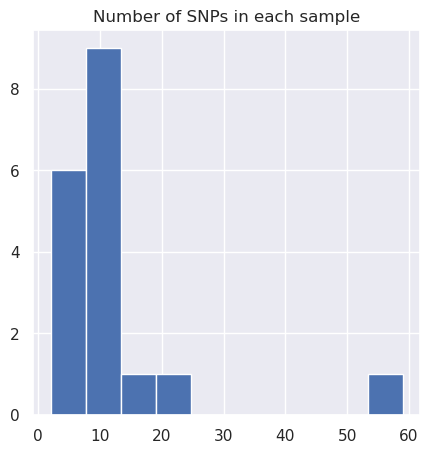

In [114]:
mpl.rcParams['figure.figsize'] = [5, 5]
merged_vcf_data.groupby('name').count().POS.hist()
plt.title("Number of SNPs in each sample")

In [96]:
merge_vcf_tile = merged_vcf_data.groupby('name').GENE.value_counts().unstack().fillna(0).T
merge_vcf_tile['mean'] = merge_vcf_tile.mean(axis=1)
merge_vcf_tile = merge_vcf_tile.sort_values(by='mean', ascending=True)
annotations = merge_vcf_tile.astype(int).astype(str).copy()
annotations[annotations == '0'] = ''

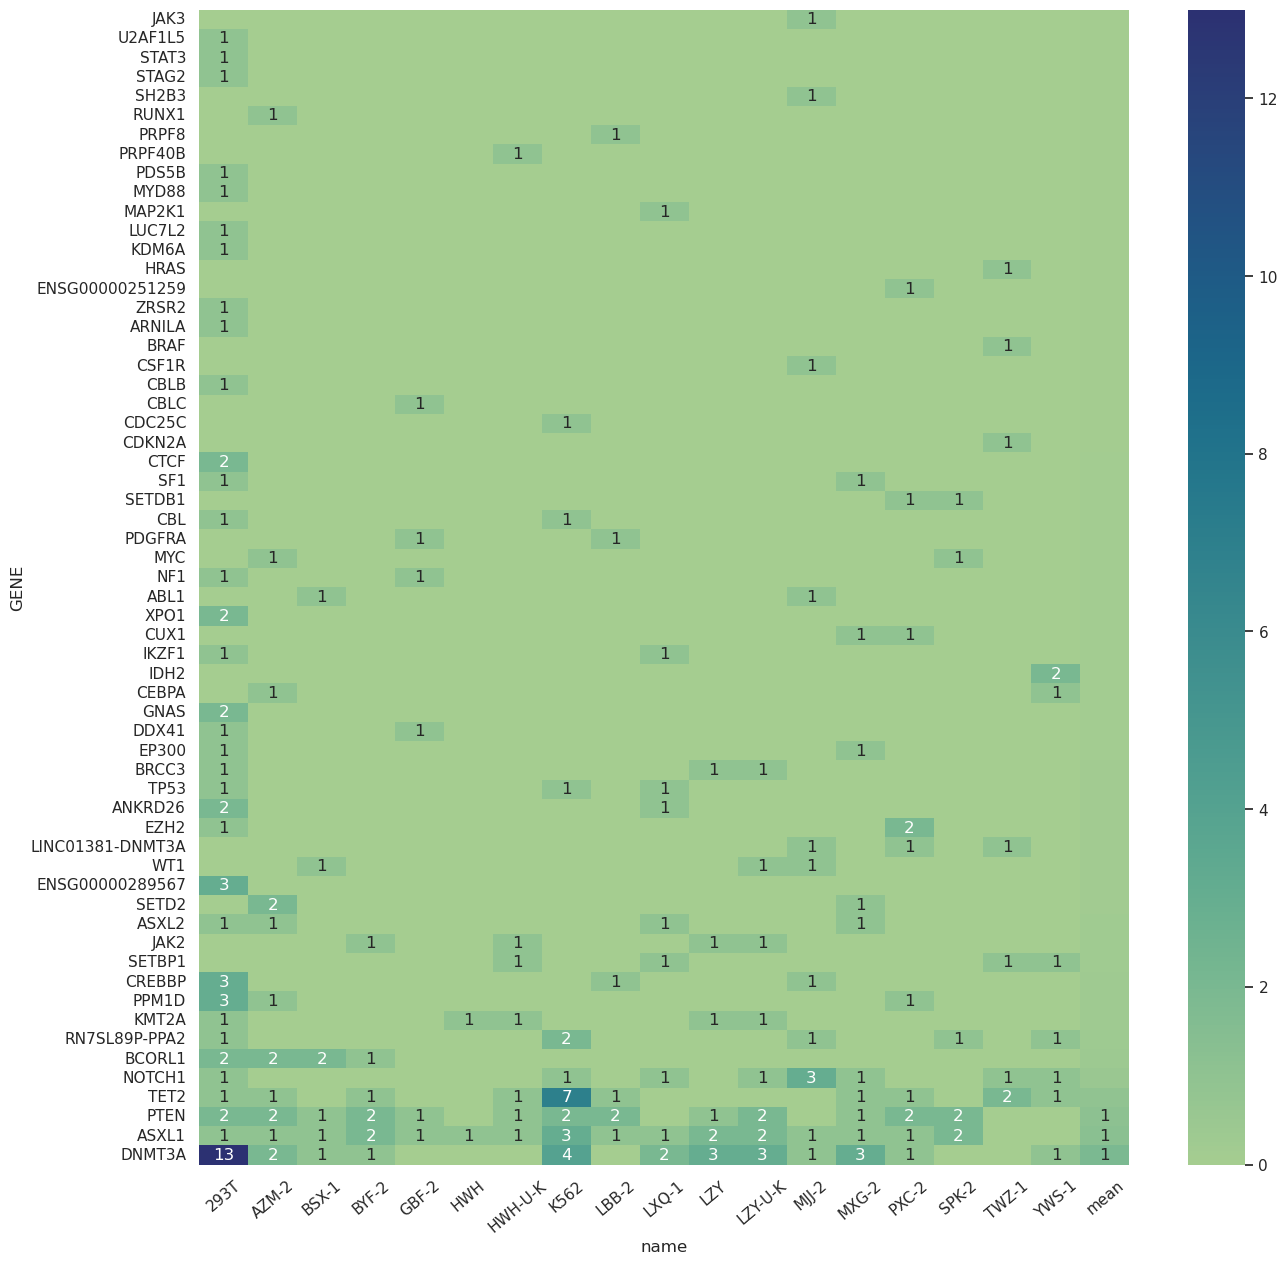

In [103]:
# Set figure size
plt.rcParams['figure.figsize'] = [15, 15]

# Create heatmap with annotations
ax = sns.heatmap(merge_vcf_tile, cmap="crest", fmt="s", annot=annotations)
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=45)
# Show plot
plt.show()

In [106]:
merged_vcf_data.loc[(merged_vcf_data['ID'] != '.') & (merged_vcf_data['GENE'] != 'DNMT3A')] 

,name,CHROM,POS,ID,REF,ALT,AF,GENE,EFFECT
45,MXG-2,chr2,25799447,COSV55460549,C,T,9.107e-03,ASXL2,missense_variant
88,MXG-2,chr9,136508980,COSV105837119,C,T,0.487,NOTCH1,missense_variant
42,293T,chr3,38140407,COSV57182142,C,T,0.017,MYD88,synonymous_variant
88,293T,chr11,119297420,COSV104382420,G,C,0.295,CBL,synonymous_variant
93,293T,chr16,3728283,COSV52125093,G,A,0.031,CREBBP,missense_variant
97,293T,chr16,3729593,COSV52129984,C,T,0.315,CREBBP,synonymous_variant
98,293T,chr16,3729607,COSV52115923,C,T,0.338,CREBBP,missense_variant
102,293T,chr16,67620773,COSV50492256,G,A,0.271,CTCF,missense_variant
104,293T,chr17,7673780,COSV52801834,T,A,0.291,TP53,missense_variant
106,293T,chr17,31258433,COSV62213516,G,A,0.294,NF1,synonymous_variant


Text(0.5, 1.0, 'Variant Effect')

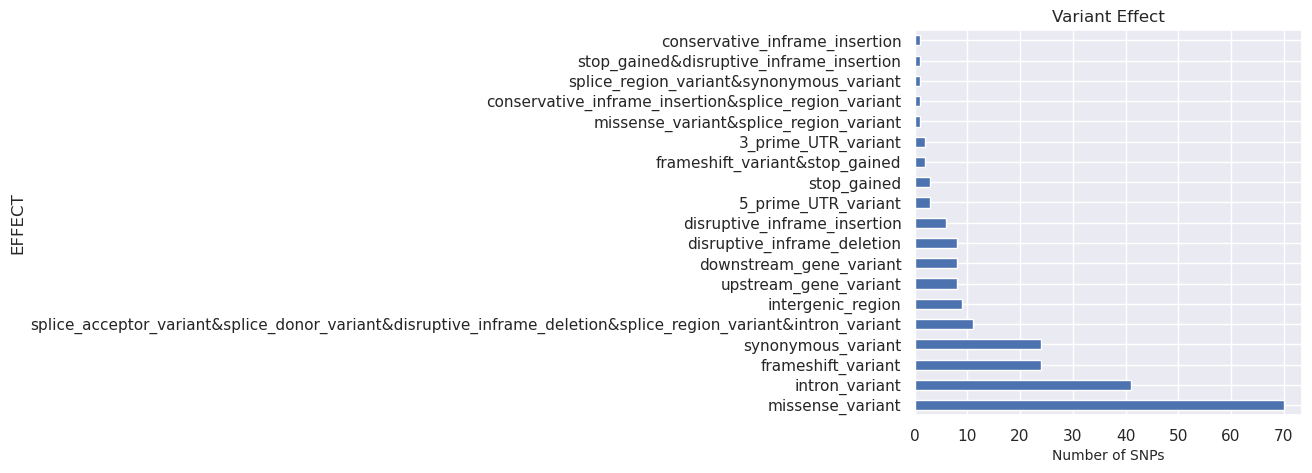

In [118]:

merged_vcf_data.value_counts('EFFECT').plot(kind='barh')
plt.xlabel(size=10, xlabel='Number of SNPs')
plt.title('Variant Effect')

In [112]:
merged_vcf_data[merged_vcf_data['EFFECT'] == 'stop_gained']

,name,CHROM,POS,ID,REF,ALT,AF,GENE,EFFECT
143,293T,chrX,155120022,.,C,T,0.032,BRCC3,stop_gained
92,K562,chr20,32434485,COSV60102562,C,A,0.334,ASXL1,stop_gained
5,AZM-2,chr2,25247691,COSV53045802,C,T,0.025,DNMT3A,stop_gained


In [113]:
merged_vcf_data[merged_vcf_data['name'] == 'AZM-2']

,name,CHROM,POS,ID,REF,ALT,AF,GENE,EFFECT
3,AZM-2,chr2,25240432,COSV53060451,A,C,0.011,DNMT3A,missense_variant
5,AZM-2,chr2,25247691,COSV53045802,C,T,0.025,DNMT3A,stop_gained
33,AZM-2,chr2,25799447,COSV55460549,C,T,9.472e-03,ASXL2,missense_variant
34,AZM-2,chr3,47017722,.,G,A,0.448,SETD2,synonymous_variant
35,AZM-2,chr3,47123495,.,A,C,0.486,SETD2,missense_variant
49,AZM-2,chr4,105276196,COSV54424885,A,G,0.027,TET2,missense_variant
65,AZM-2,chr8,127738361,COSV52369984,G,C,6.510e-03,MYC,missense_variant
72,AZM-2,chr10,87864100,.,CGGCT,C,0.038,PTEN,splice_acceptor_variant&splice_donor_variant&d...
74,AZM-2,chr10,87864143,.,TGCG,T,0.027,PTEN,disruptive_inframe_deletion
103,AZM-2,chr17,60600631,.,C,G,0.503,PPM1D,missense_variant


In [119]:
merged_vcf_data[merged_vcf_data['name'] == '293T']

,name,CHROM,POS,ID,REF,ALT,AF,GENE,EFFECT
3,293T,chr2,25234839,.,T,A,0.687,DNMT3A,downstream_gene_variant
9,293T,chr2,25263901,.,T,C,0.680,DNMT3A,intron_variant
13,293T,chr2,25265950,.,T,A,0.346,DNMT3A,intron_variant
14,293T,chr2,25268187,.,A,G,0.356,DNMT3A,intron_variant
15,293T,chr2,25273624,.,G,A,0.664,DNMT3A,intron_variant
16,293T,chr2,25275696,.,C,G,0.296,DNMT3A,upstream_gene_variant
17,293T,chr2,25277420,.,T,A,0.330,DNMT3A,upstream_gene_variant
25,293T,chr2,25286295,.,G,A,0.651,DNMT3A,intron_variant
27,293T,chr2,25291464,.,C,T,0.366,DNMT3A,intron_variant
28,293T,chr2,25297988,.,G,A,0.330,DNMT3A,intron_variant


Text(0.5, 1.0, 'AF distribution of 293T')

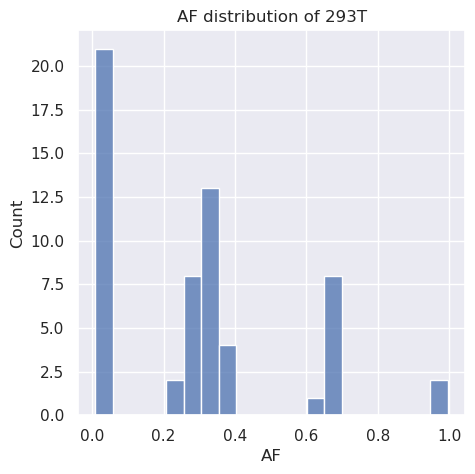

In [124]:
sns.histplot(x=merged_vcf_data[merged_vcf_data['name'] == '293T'].AF.astype(float), bins=20)
plt.title("AF distribution of 293T")

[Text(1, 0.46428571428571425, 'intron_variant'),
 Text(1, 1.3928571428571428, 'intergenic_region'),
 Text(1, 2.3214285714285716, 'missense_variant'),
 Text(1, 3.25, 'splice_acceptor_variant&splice_donor_variant&disruptive_inframe_deletion&splice_region_variant&intron_variant'),
 Text(1, 4.178571428571429, 'disruptive_inframe_deletion'),
 Text(1, 5.107142857142857, 'synonymous_variant'),
 Text(1, 6.035714285714286, '5_prime_UTR_variant'),
 Text(1, 6.964285714285714, 'upstream_gene_variant'),
 Text(1, 7.892857142857142, 'stop_gained'),
 Text(1, 8.821428571428571, 'downstream_gene_variant'),
 Text(1, 9.75, 'frameshift_variant'),
 Text(1, 10.678571428571429, 'missense_variant&splice_region_variant'),
 Text(1, 11.607142857142858, 'frameshift_variant&stop_gained')]

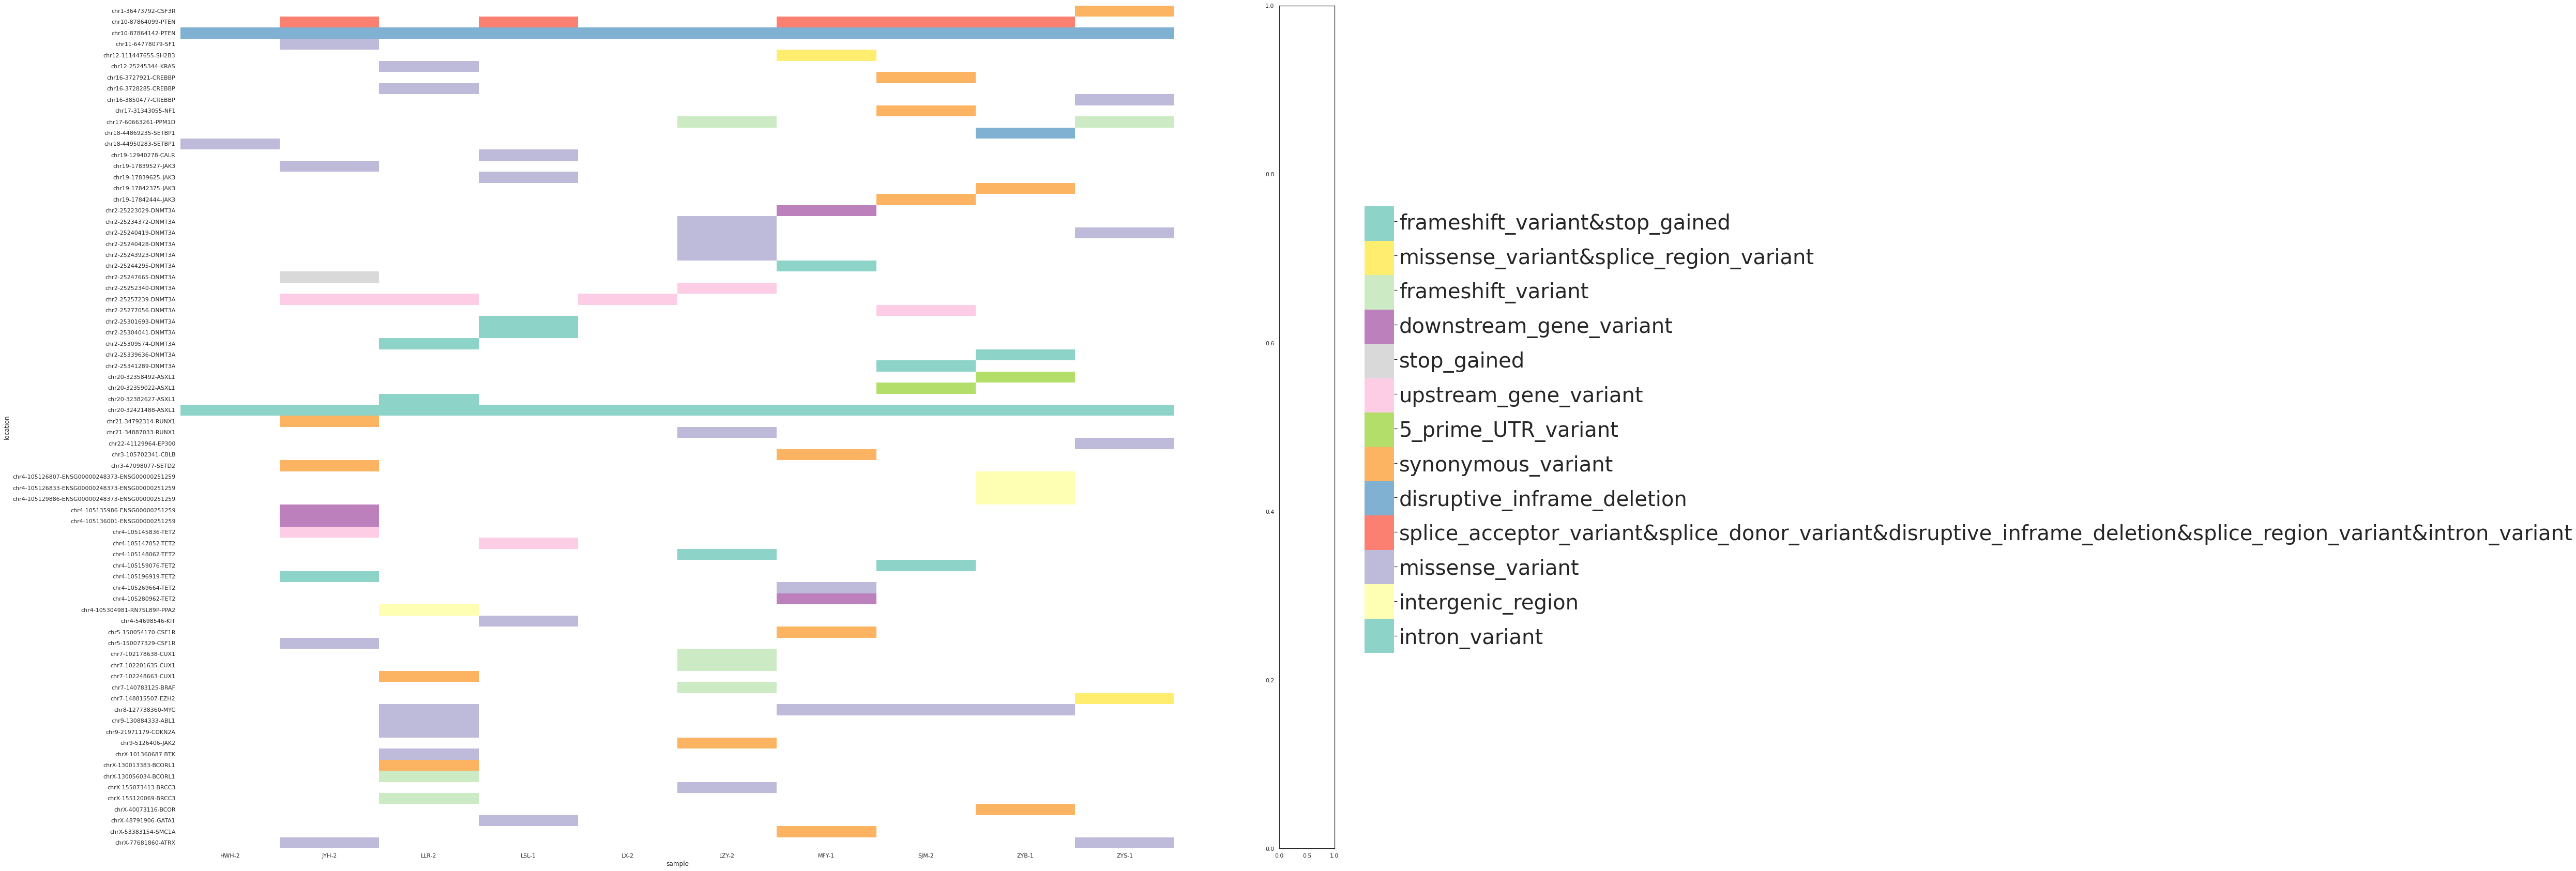

In [34]:
mpl.rcParams['figure.figsize'] = [40, 30]
sns.set_style('white')
fig, (ax, cax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios": [0.9, 0.05]})
cax = fig.add_axes([.92, .3, .02, .4])
cmap = sns.color_palette("Set3", 13) 
sns.heatmap(merged_df_wide, ax=ax, cbar_ax=cax, cmap=cmap, mask=merged_df_wide.isna())
cax.set_yticks([(x+0.5)/14*13 for x in range(13)])
# ax.set_ylabel('Location', fontsize=30)
cax.set_yticklabels(c_label, fontsize=40)

### DownSampling

In [11]:
file_list = os.listdir("00.raw_data")
name_list = set([x.split('.')[0][:-2] for x in file_list])
depth_list = range(1,8)
fraction_list = list(map(str, [x/7 for x in depth_list]))
downsample_path = "02.map/Downsampling/stat_info"

In [12]:
p1_df_dict_list = [{},{},{}]
for i,fraction in enumerate(fraction_list):
    for j in range(3):
        p1_df_dict_list[j][str(depth_list[i])] = []
    for name in name_list:
        file = name+'_'+fraction+'_Target_stats.tsv'
        if 'P1' in file:
            _df = pd.read_csv(os.path.join(downsample_path, file), '\t')
            for j in range(3):
                p1_df_dict_list[j][str(depth_list[i])].append(_df.iloc[0,j])
downsample_df_1 = pd.DataFrame(p1_df_dict_list[0])
downsample_df_3 = pd.DataFrame(p1_df_dict_list[1])
downsample_df_5 = pd.DataFrame(p1_df_dict_list[2])

In [13]:
p2_df_dict_list = [{},{},{}]
for i,fraction in enumerate(fraction_list):
    for j in range(3):
        p2_df_dict_list[j][str(depth_list[i])] = []
    for name in name_list:
        file = name+'_'+fraction+'_Target_stats.tsv'
        if 'P2' in file:
            _df = pd.read_csv(os.path.join(downsample_path, file), '\t')
            for j in range(3):
                p2_df_dict_list[j][str(depth_list[i])].append(_df.iloc[0,j])
downsample_df_1_p2 = pd.DataFrame(p2_df_dict_list[0])
downsample_df_3_p2 = pd.DataFrame(p2_df_dict_list[1])
downsample_df_5_p2 = pd.DataFrame(p2_df_dict_list[2])

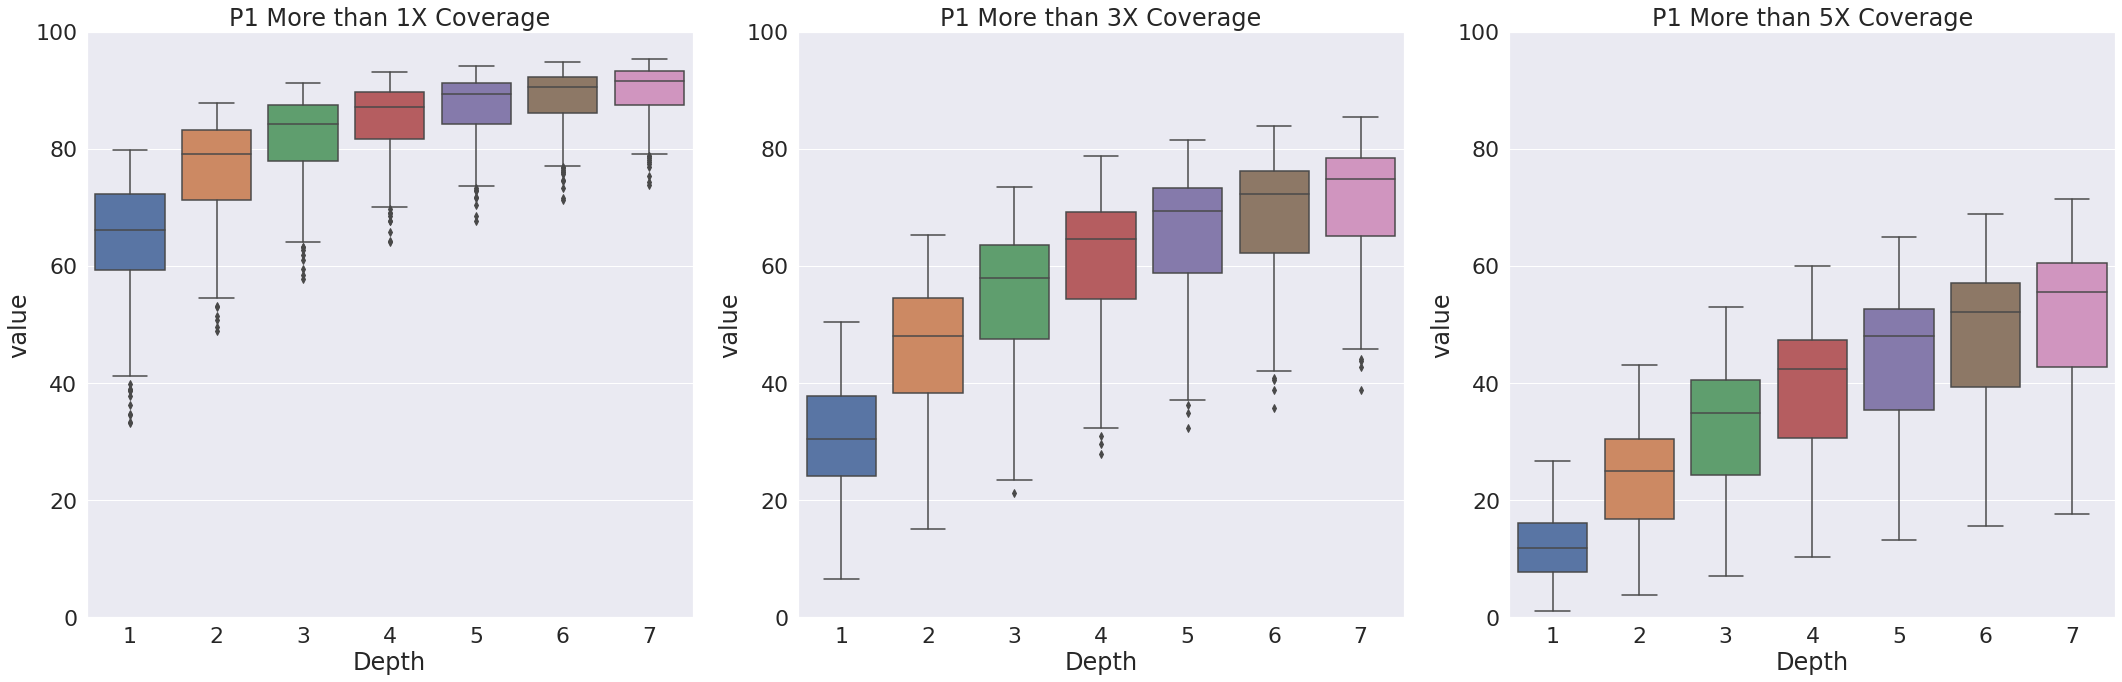

In [14]:
mpl.rcParams['figure.figsize'] = [30, 10]
sns.set(font_scale = 2)
fig, axes = plt.subplots(nrows=1, ncols=3)
for num, i in enumerate(['1','3','5']):
    sns.boxplot(x='variable', y='value', data=pd.melt(eval("downsample_df_"+i)), ax=axes[num])
    axes[num].set(xlabel='Depth', ylim=(0,100))
    axes[num].set_title('P1 More than '+i+'X Coverage')
fig.tight_layout()
plt.show()

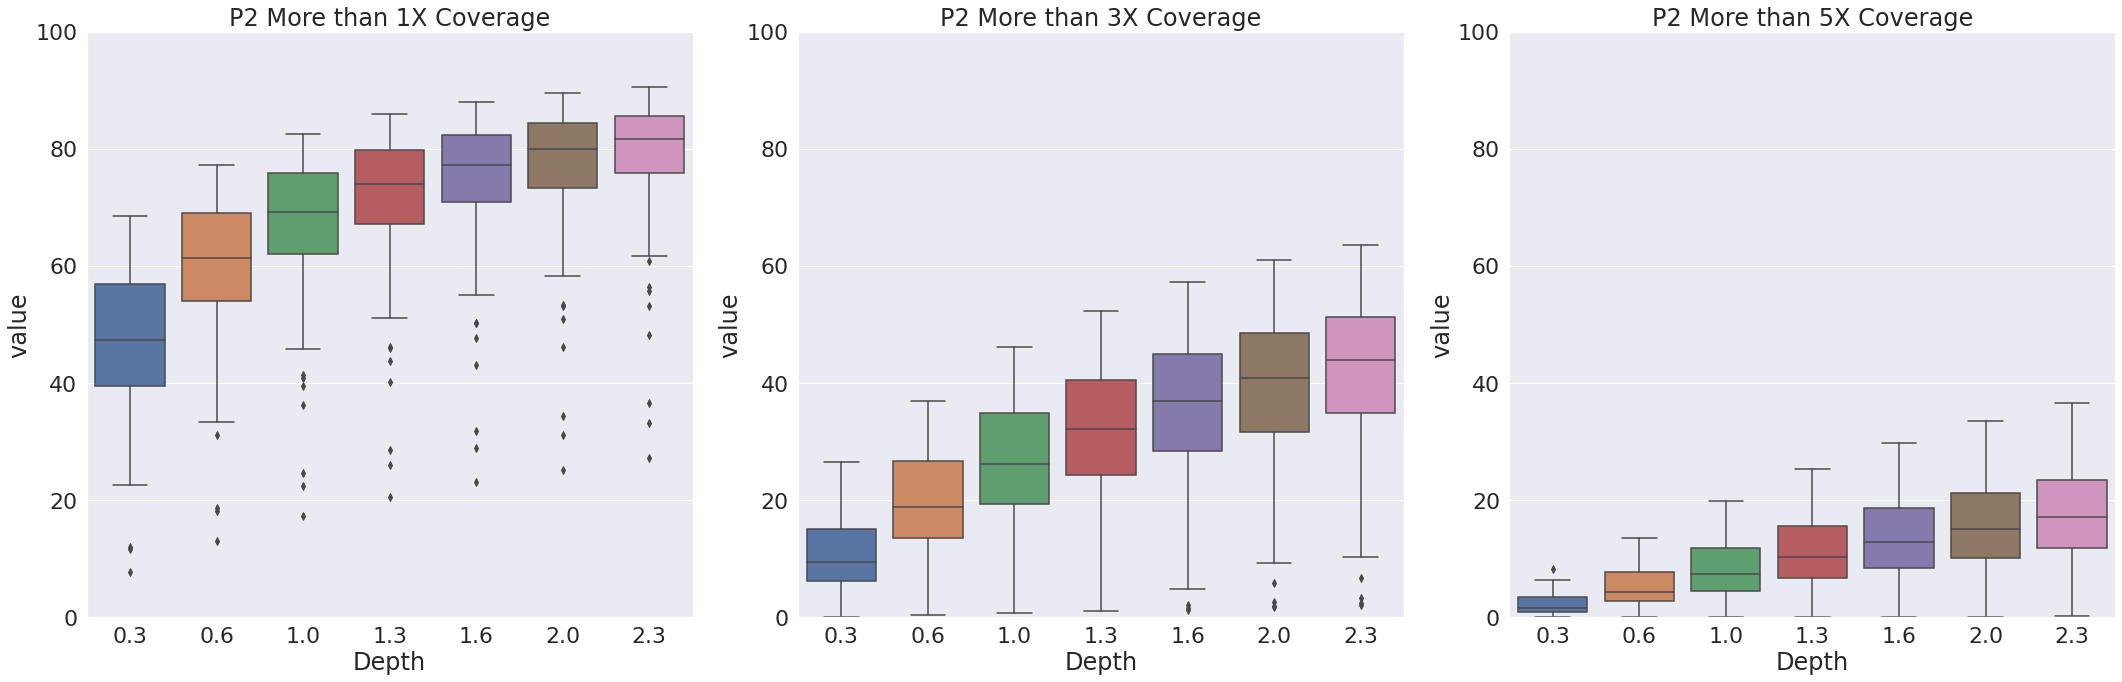

In [15]:
sns.set(font_scale = 2)
fig, axes = plt.subplots(nrows=1, ncols=3)
for num, i in enumerate(['1','3','5']):
    sns.boxplot(x='variable', y='value', data=pd.melt(eval("downsample_df_"+i+"_p2")), ax=axes[num])
    axes[num].set(xlabel='Depth', ylim=(0,100))
    axes[num].set_title('P2 More than '+i+'X Coverage')
    axes[num].set_xticklabels((str(x/3)[:3] for x in range(1,8)))
fig.tight_layout()
plt.show()

note:
1. 总的来说提升幅度比较线性，符合概率模型
2. 大概有如此关系$Coverage = Depth/10$

## 20230314 修改
1. issue fixed：修正100X的错误
2. 按照P1、P2两个酶的区别得到对应的覆盖率-乘数曲线
3. 可视化bed文件中覆盖条数区域的分布

In [16]:
import numpy as np
def experiment(i):
    total = [0]*1000
    while i>0:
        start = int(np.random.uniform(0,990))
        for j in range(10):
            total[start+j] += 1
        i -= 1
    result = [x for x in total if x>=5]
    return len(result)
res = []
for i in range(2000):
    res.append(experiment(i)/1000)

<AxesSubplot:>

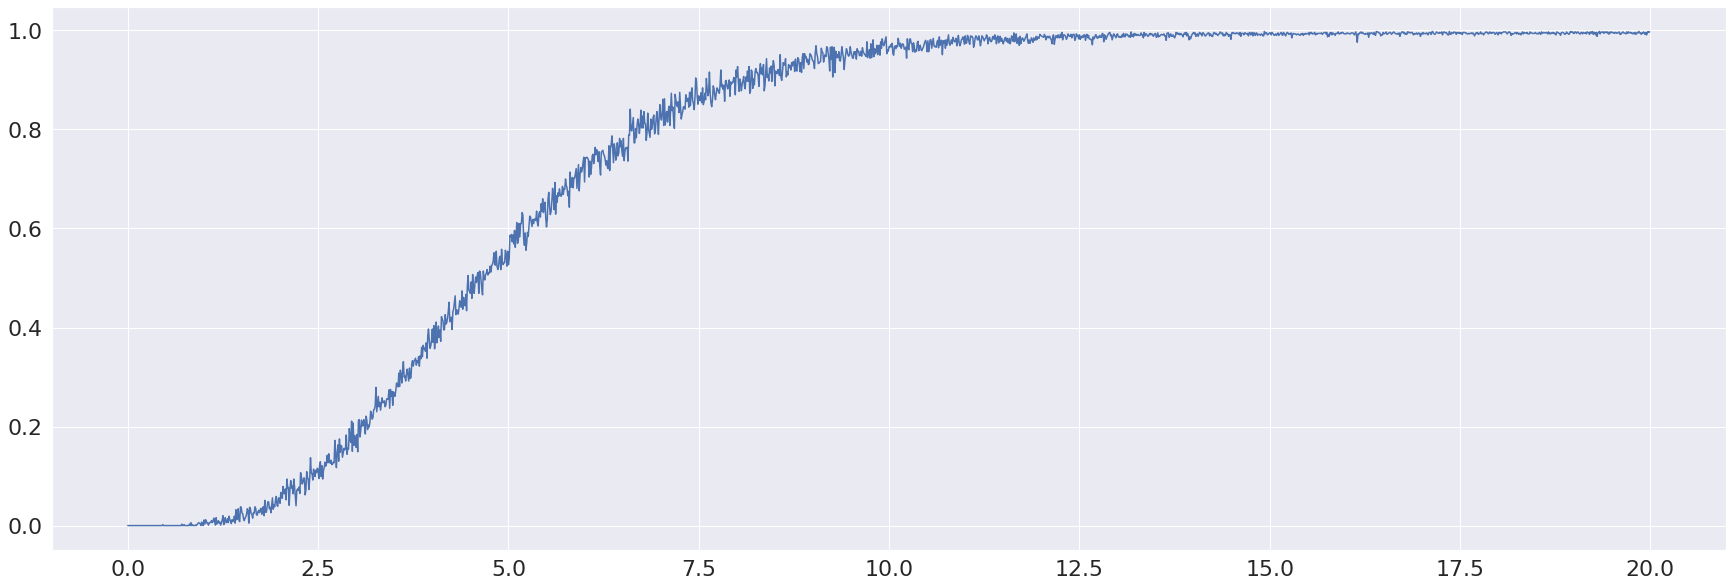

In [17]:
sns.lineplot(x=[x/100 for x in range(2000)] ,y=res)

note：这是一个简单的数值模拟，对于大于5reads的覆盖率，绝对均匀的情况下应该在10X的情况下达到饱和

## 测序的直方图分布情况

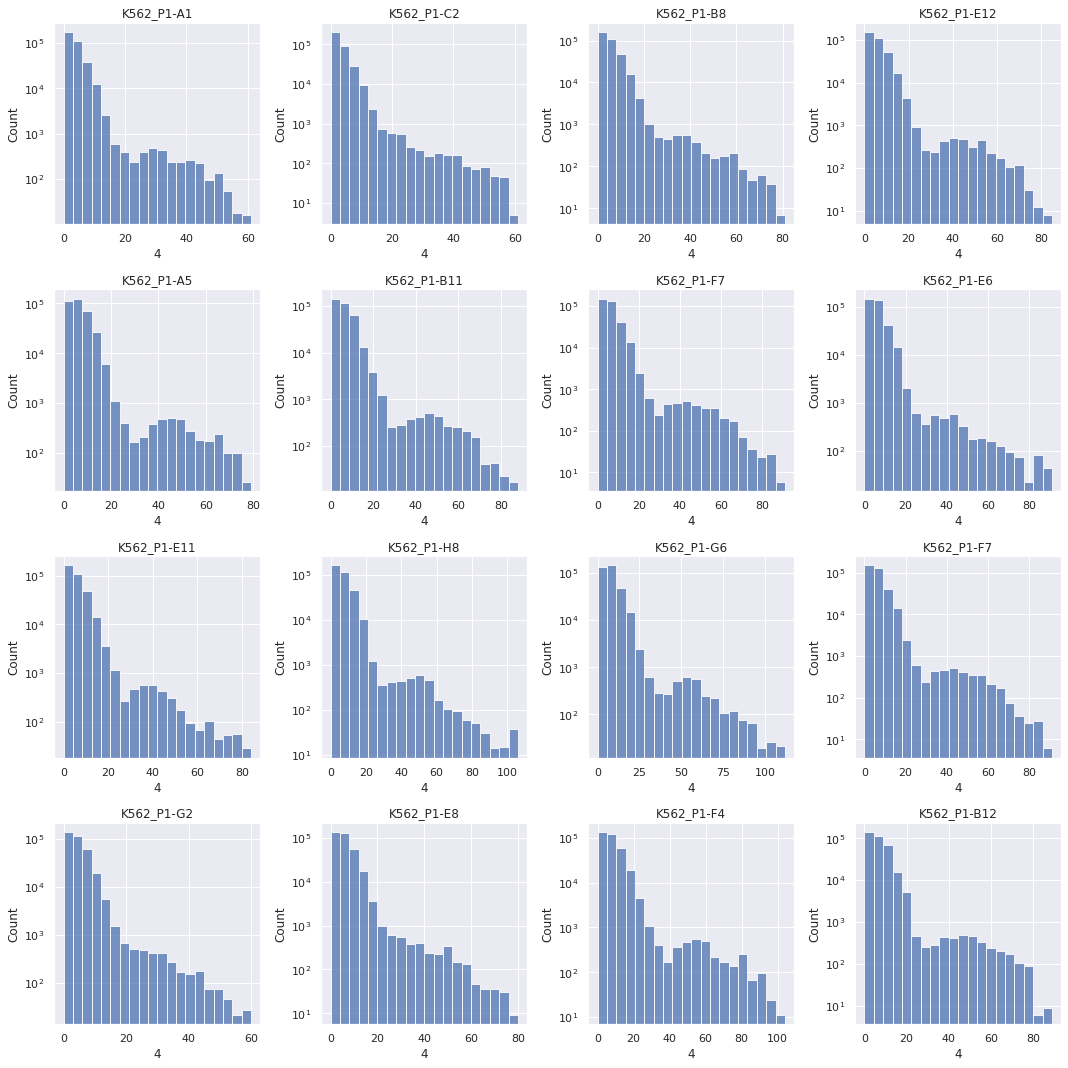

In [32]:
mpl.rcParams['figure.figsize'] = [15, 15]
sns.set(font_scale = 1)
base_dis_path = "02.map/base_distribution"
file_list = os.listdir(base_dis_path)
p1_file_list = [x for x in file_list if 'P1' in x] # 只对P1进行画图
name_list = [x.split('_')[0]+'_'+x.split('_')[1] for x in p1_file_list]
random_pick = []
for i in range(16):
    num = random.randint(0, len(p1_file_list)-1)
    random_pick.append(num)
fig, axes = plt.subplots(nrows=4, ncols=4)
for i in range(16):
    row = i//4
    col = i%4
    df = pd.read_csv(os.path.join(base_dis_path, p1_file_list[random_pick[i]]), sep='\t', header=None)
    sns.histplot(df.iloc[:,4], ax=axes[row, col], bins=20, log_scale=(False, 10))
    axes[row, col].set_title(name_list[random_pick[i]])
fig.tight_layout()
plt.show()

Note:
这是对数底的画图，总体没有太多的PCR bias

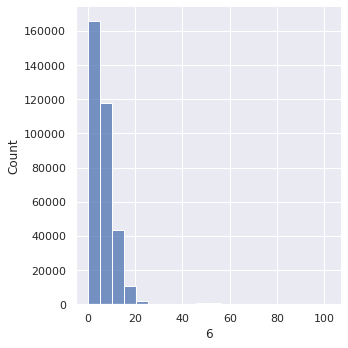

In [55]:
mpl.rcParams['figure.figsize'] = [10, 5]
sns.displot(df.iloc[:,4], bins=20)

### 测序的直方图分布情况——Slice 3个重要基因

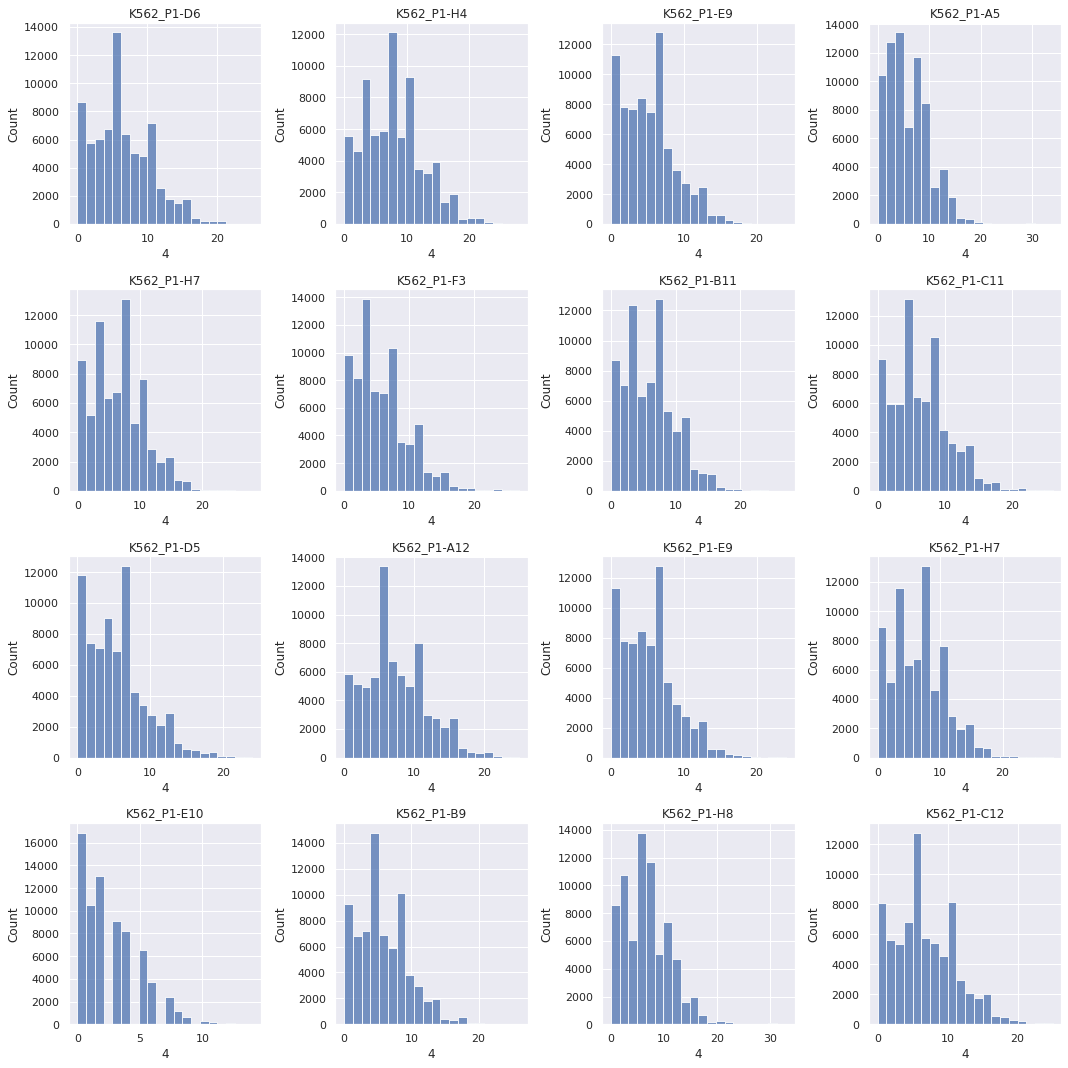

In [34]:
mpl.rcParams['figure.figsize'] = [15, 15]
sns.set(font_scale = 1)
base_dis_path = "02.map/base_distribution/splice"
file_list = os.listdir(base_dis_path)
p1_file_list = [x for x in file_list if 'P1' in x] # 只对P1进行画图
name_list = [x.split('_')[0]+'_'+x.split('_')[1] for x in p1_file_list]
random_pick = []
for i in range(16):
    num = random.randint(0, len(p1_file_list)-1)
    random_pick.append(num)
fig, axes = plt.subplots(nrows=4, ncols=4)
for i in range(16):
    row = i//4
    col = i%4
    df = pd.read_csv(os.path.join(base_dis_path, p1_file_list[random_pick[i]]), sep='\t', header=None)
    sns.histplot(df.iloc[:,4], ax=axes[row, col], bins=20)
    axes[row, col].set_title(name_list[random_pick[i]]+"_slice")
fig.tight_layout()
plt.show()

# 20230324
新的一批target数据，测序深度改变

In [ ]:
stats_path = "../"
file_list = [x for x in os.listdir(stats_path) if x.endswith("tsv")]
name_list = [x[:10] for x in file_list]
sns.set()